## Data Loading and Exploration
Imported relevant Python libraries and the dataset.

Displayed the first few rows to understand the structure.

Checked column names, data types, and basic statistics (.info(), .describe()).

Identified categorical vs. numerical features for further analysis.

In [1]:
# Import needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split # Data Preprocessing
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression # Linear Regression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestClassifier # Random Forest
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
import pickle # Model Packaging

In [2]:
# Load and Preview the data
data = pd.read_csv('marketing_campaign.csv')
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [3]:
# Overview of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [4]:
# Statistical summaries for numerical columns
data.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [5]:
# Identified numerical and categorical features
num_cols = data.select_dtypes(include=['int64','float64']).columns
cat_cols = data.select_dtypes(include=['object']).columns
print("\nNumerical columns:", list(num_cols))
print("Total numerical columns:", len(num_cols))
print("\nCategorical columns:", list(cat_cols))
print("Total categorical columns:", len(cat_cols))


Numerical columns: ['ID', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response']
Total numerical columns: 26

Categorical columns: ['Education', 'Marital_Status', 'Dt_Customer']
Total categorical columns: 3


## Data Cleaning
Handled missing values(24 in Income) and imputed them using the mean.

Converted date fields (i.e., Dt_Customer) to proper datetime format.

Handled the outliers in Income and Year_Birth

In [6]:

# Data Cleaning
# Check missing values
print("\nMissing values before cleaning:")
print(data.isnull().sum())

# Impute missing Income values with mean
if data['Income'].isnull().sum() > 0:
    data['Income'].fillna(data['Income'].mean(), inplace=True)

# Handle outliers in Income (IQR capping)
Q1, Q3 = data['Income'].quantile([0.25, 0.75])
IQR = Q3 - Q1
low, high = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
data['Income'] = np.where(data['Income'] > high, high,
                          np.where(data['Income'] < low, low, data['Income']))

# Handle outliers in Year_Birth (keep only reasonable values)
data = data[(data['Year_Birth'] >= 1900) & (data['Year_Birth'] <= 2005)]





Missing values before cleaning:
ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64


/tmp/ipython-input-1529966900.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Income'].fillna(data['Income'].mean(), inplace=True)


In [7]:
# Convert Dt_Customer to datetime
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'], format="%d-%m-%Y")




In [8]:
# Validate cleaning
print("\nMissing values after cleaning:")
print(data.isnull().sum())

print("\nStatistical summary after cleaning:")
display(data.describe())




Missing values after cleaning:
ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

Statistical summary after cleaning:


,ID,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2238.000000,2238.000000,2238.000000,2238.000000,2238.000000,2238,2238.000000,2238.000000,2238.000000,2238.000000,...,2238.000000,2238.000000,2238.000000,2238.000000,2238.000000,2238.000000,2238.000000,2238.0,2238.0,2238.000000
mean,5591.726542,1968.870867,51857.293580,0.444593,0.506256,2013-07-10 05:51:57.426273536,49.126899,303.866399,26.261394,166.845845,...,5.319035,0.072833,0.074620,0.072386,0.064343,0.013405,0.009383,3.0,11.0,0.149240
min,0.000000,1900.000000,1730.000000,0.000000,0.000000,2012-07-30 00:00:00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2829.500000,1959.000000,35528.250000,0.000000,0.000000,2013-01-16 00:00:00,24.000000,24.000000,1.000000,16.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51684.000000,0.000000,0.000000,2013-07-08 00:00:00,49.000000,173.500000,8.000000,67.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8425.250000,1977.000000,68279.250000,1.000000,1.000000,2013-12-30 00:00:00,74.000000,504.000000,33.000000,231.750000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,117416.250000,2.000000,2.000000,2014-06-29 00:00:00,99.000000,1493.000000,199.000000,1725.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000
std,3244.738151,11.789612,20933.995509,0.538475,0.544576,NaN,28.968807,336.554591,39.709405,225.635721,...,2.425853,0.259920,0.262836,0.259184,0.245418,0.115026,0.096434,0.0,0.0,0.356405


## Feature Engineering
Created new features such as CustomerAge from Year_Birth, .

Grouped related features to capture customer spending behavior (e.g., total amount spent across products).

In [19]:
# Feature Engineering
# CustomerValueTier based on Total Spend
spend_cols = ['MntWines','MntFruits','MntMeatProducts',
              'MntFishProducts','MntSweetProducts','MntGoldProds']
data['TotalSpend'] = data[spend_cols].sum(axis=1)

def tier(x):
    if x >= 1000:
        return 'Premium'
    elif x >= 500:
        return 'Gold'
    elif x >= 200:
        return 'Silver'
    else:
        return 'Bronze'

data['CustomerValueTier'] = data['TotalSpend'].apply(tier)

# CustomerAge
current_year = pd.Timestamp.now().year
data['CustomerAge'] = current_year - data['Year_Birth']

# AverageSpending
data['AverageSpending'] = round(data[spend_cols].mean(axis=1), 2)

# Preview engineered features
print("\nPreview of new engineered features:")
display(data[['TotalSpend','CustomerValueTier','CustomerAge', 'AverageSpending']].head())


Preview of new engineered features:


,TotalSpend,CustomerValueTier,CustomerAge,AverageSpending
0,1617,Premium,68,269.50
1,27,Bronze,71,4.50
2,776,Gold,60,129.33
3,53,Bronze,41,8.83
4,422,Silver,44,70.33


## Exploratory Data Analysis
Performed univariate and bivariate analysis of features.

Visualized distributions of numerical features (e.g., income, age).

Analyzed relationships between customer demographics.

Built correlation heatmaps to identify relationships among numerical features.

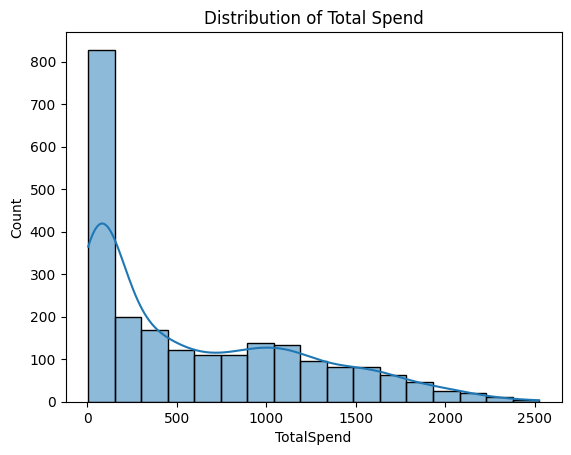

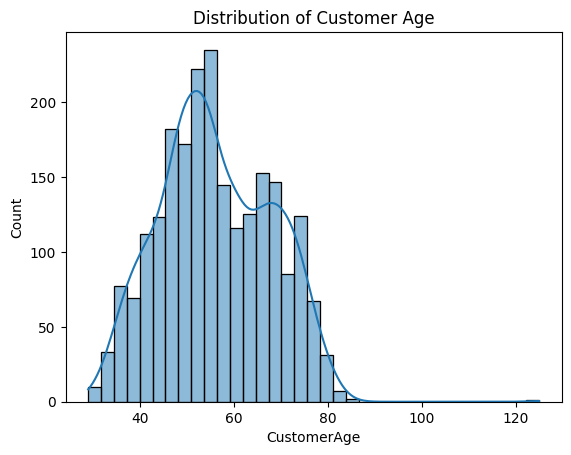

In [10]:
# Distribution of Total Spend and Customer Age
# Histogram: Total Spend
sns.histplot(data['TotalSpend'], kde=True)
plt.title("Distribution of Total Spend")
plt.show()

# Histogram: Customer Age
sns.histplot(data['CustomerAge'], kde=True)
plt.title("Distribution of Customer Age")
plt.show()

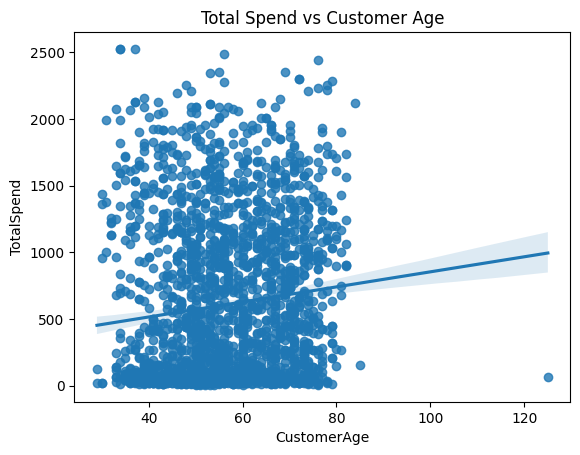

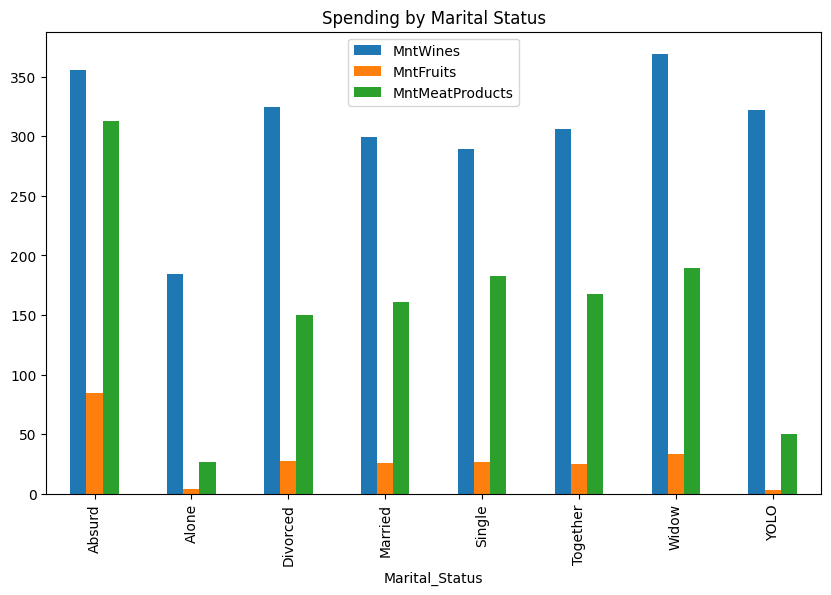

In [11]:
# Relationship between Age and Total Spend
sns.regplot(x='CustomerAge', y='TotalSpend', data=data)
plt.title("Total Spend vs Customer Age")
plt.show()

# Relationship between Marital status and Total Spend
# Marital status vs spend
marital_spend = data.groupby('Marital_Status')[['MntWines','MntFruits','MntMeatProducts']].mean()
marital_spend.plot(kind='bar', figsize=(10,6))
plt.title("Spending by Marital Status")
plt.show()

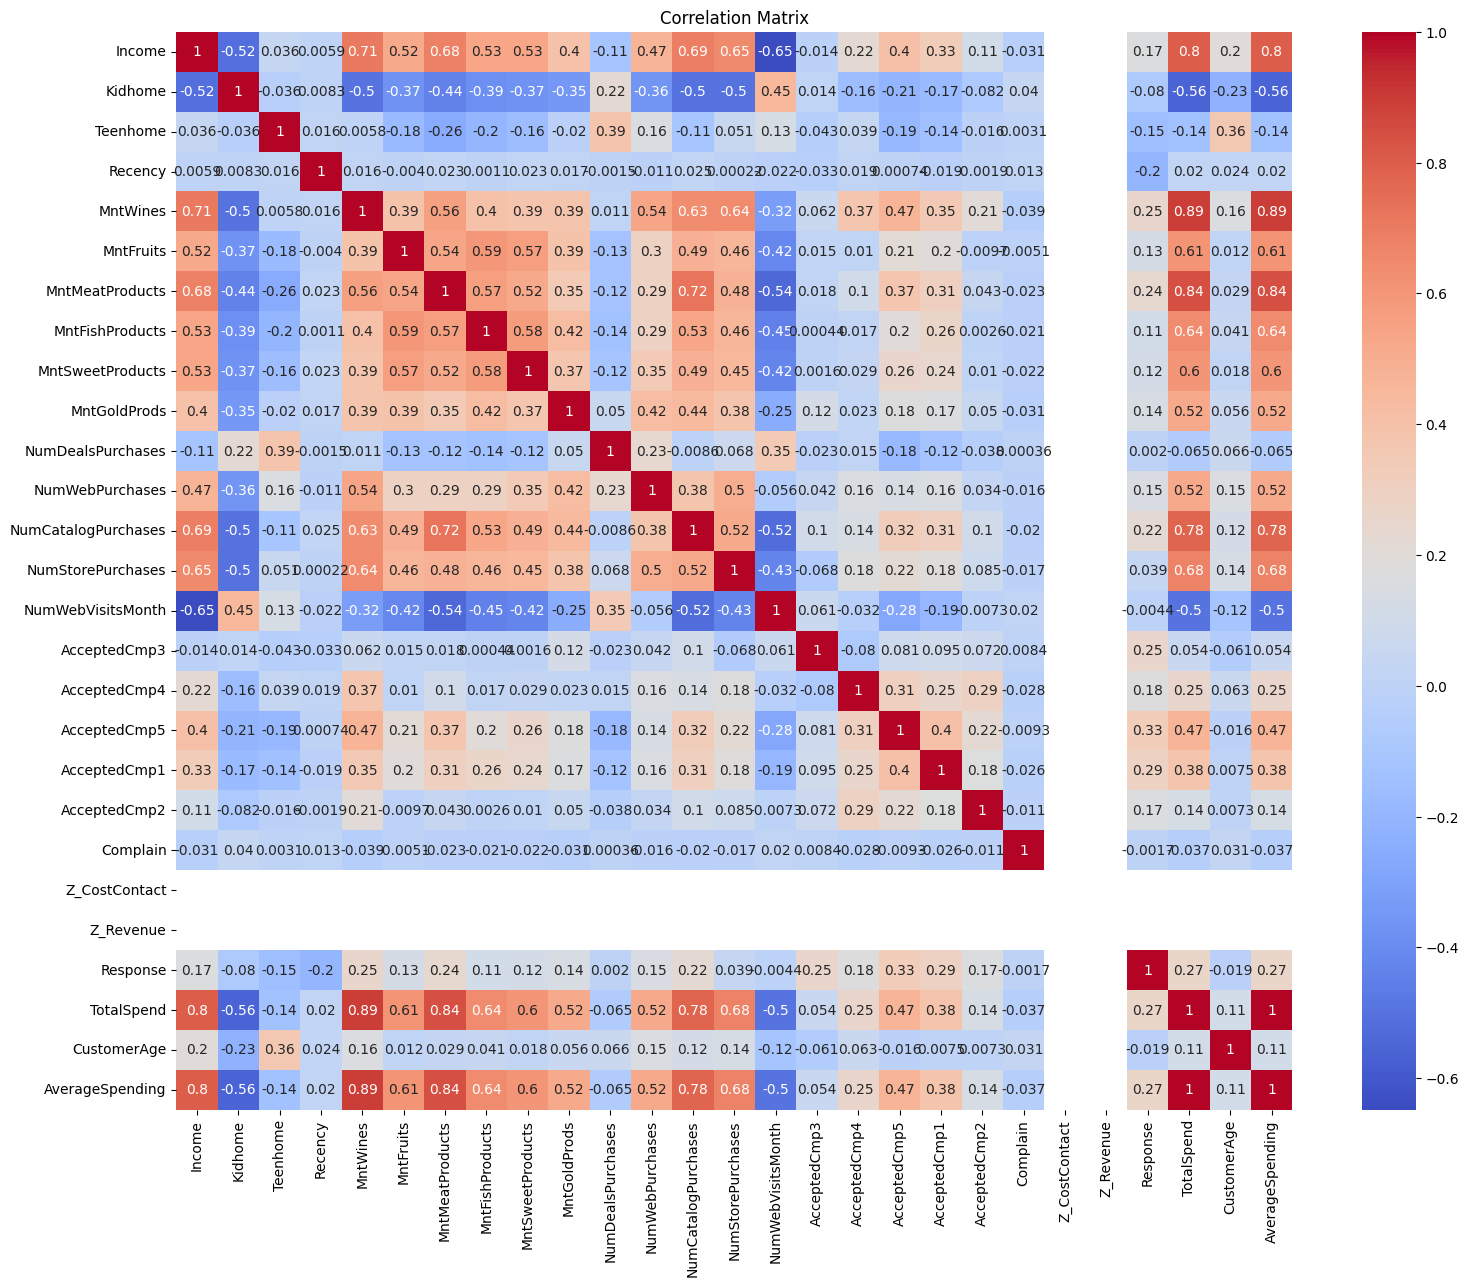

In [12]:
# Relationship between numerical variables
# Correlation heatmap
num_cols = data.select_dtypes(include=['int64','float64']).columns.drop(["ID", "Year_Birth"])
plt.figure(figsize=(18,14))
sns.heatmap(data[num_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

## Model Development and Deployment
### Data Preprocessing
Split the dataset into training and test sets.

Applied preprocessing pipelines (encoding + scaling).

In [13]:
# Data Preprocessing
# Select features for modeling
features = ['CustomerAge','Income','Recency','NumWebVisitsMonth',
            'NumDealsPurchases','Education','Marital_Status']

X = data[features]
y_reg = data['TotalSpend']             # Regression target
y_clf = data['CustomerValueTier']      # Classification target

# Train-test split
X_train, X_test, y_train_reg, y_test_reg = train_test_split(
    X, y_reg, test_size=0.2, random_state=42
)

_, _, y_train_clf, y_test_clf = train_test_split(
    X, y_clf, test_size=0.2, random_state=42
)

# Separate numerical and categorical
num_features = ['CustomerAge','Income','Recency','NumWebVisitsMonth','NumDealsPurchases']
cat_features = ['Education','Marital_Status']

# Preprocessing pipeline
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), num_features),
    ("cat", OneHotEncoder(handle_unknown="ignore"), cat_features)
])

print("✅ Preprocessing pipeline set up successfully.")


✅ Preprocessing pipeline set up successfully.


### Model Development
Built baseline classification models to predict campaign response.


Compared different models (e.g., Logistic Regression, Random Forest, etc.) using accuracy, precision, recall, and F1-score.


In [14]:
# Linear Regression Model
reg_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("regressor", LinearRegression())
])

# Fit model
reg_pipeline.fit(X_train, y_train_reg)

# Predictions
y_pred_reg = reg_pipeline.predict(X_test)

# Evaluation
rmse = np.sqrt(mean_squared_error(y_test_reg, y_pred_reg))
r2 = r2_score(y_test_reg, y_pred_reg)

print("Linear Regression RMSE:", rmse)
print("Linear Regression R2:", r2)


Linear Regression RMSE: 342.6776300990201
Linear Regression R2: 0.6839842207385661


In [15]:
# Random Forest Classifier with GridSearchCV
clf_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", RandomForestClassifier(random_state=42))
])

param_grid = {
    "classifier__n_estimators": [50,100],
    "classifier__max_depth": [5,10,None]
}

grid = GridSearchCV(clf_pipeline, param_grid, cv=3, scoring="f1_macro")
grid.fit(X_train, y_train_clf)

print("Best Parameters:", grid.best_params_)

# Predictions
y_pred_clf = grid.predict(X_test)

print("\nClassification Report:\n", classification_report(y_test_clf, y_pred_clf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test_clf, y_pred_clf))


Best Parameters: {'classifier__max_depth': None, 'classifier__n_estimators': 100}

Classification Report:
               precision    recall  f1-score   support

      Bronze       0.88      0.91      0.89       184
        Gold       0.42      0.41      0.42        70
     Premium       0.79      0.82      0.81       134
      Silver       0.48      0.38      0.43        60

    accuracy                           0.74       448
   macro avg       0.64      0.63      0.64       448
weighted avg       0.73      0.74      0.73       448


Confusion Matrix:
 [[168   5   0  11]
 [  4  29  25  12]
 [  1  21 110   2]
 [ 19  14   4  23]]


## Model Deployment
Saved the final model using pickle for future use.

Reloaded the model to verify reproducibility.

Tested the model with sample customer data to generate predictions.

Ensured the pipeline (data preprocessing + model prediction) is fully automated for deployment.



In [16]:
# Model Packaging & Deployment
# Save best-performing model (Random Forest Classifier with preprocessing)
with open("best_model.pkl", "wb") as f:
    pickle.dump(grid.best_estimator_, f)

print("✅ Model saved as best_model.pkl")

# Load model back
with open("best_model.pkl", "rb") as f:
    loaded_model = pickle.load(f)

# Sample prediction
sample_data = pd.DataFrame({
    'CustomerAge': [50],
    'Income': [60000],
    'Recency': [30],
    'NumWebVisitsMonth': [5],
    'NumDealsPurchases': [2],
    'Education': ['Graduation'],
    'Marital_Status': ['Married']
})

prediction = loaded_model.predict(sample_data)
print("Prediction for sample customer:", prediction[0])


✅ Model saved as best_model.pkl
Prediction for sample customer: Gold
